# Applied Machine Learning

## 1. A simple classification task

### Librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from pandas.plotting import scatter_matrix

In [38]:
from matplotlib import cm

In [5]:
from sklearn.model_selection import train_test_split

### Datos

In [6]:
df = pd.read_table('datasets/fruit_data_with_colors.txt')

In [8]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


**EDA**

In [39]:
cmap = cm.get_cmap('gnuplot')

In [68]:
colores = ['red', 'blue', 'yellow', 'green']

In [69]:
y_train

,fruit_label
42,3
48,4
7,2
14,1
32,3
49,4
29,3
37,3
56,4
18,1


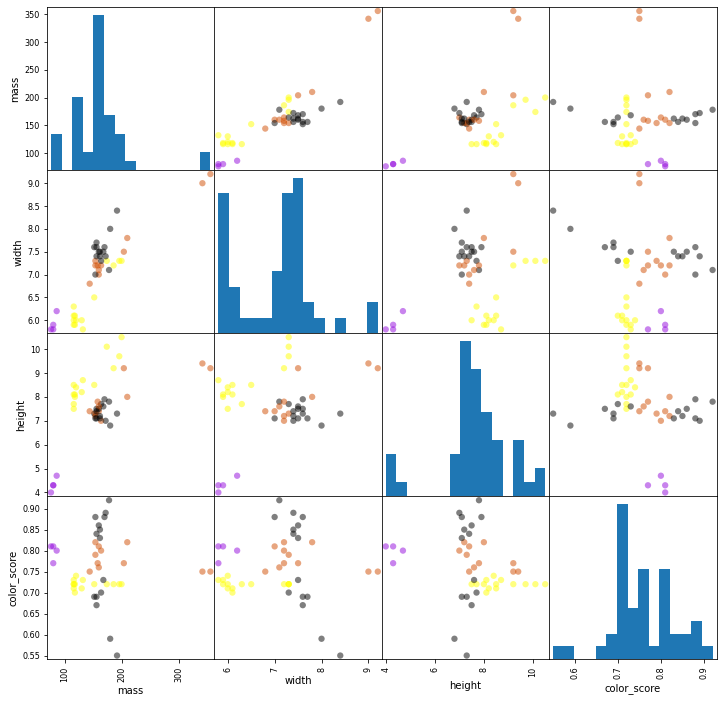

In [70]:
scatter = scatter_matrix(
    X_train, 
    c = y_train['fruit_label'],
    marker='o', 
    s=40, 
    hist_kwds={'bins':15},
    figsize=(12,12), 
    cmap=cmap
)

**Separamos nuestros datos**

In [16]:
X = df[['mass', 'width', 'height', 'color_score']]

In [17]:
y = df[['fruit_label']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)